In [9]:
"""第一題"""
import thinkdsp as td
import numpy as np

In [16]:
import thinkdsp as td

class LSTrombone(td.Chirp):
    def evaluate(self, ts):
        l1, l2= 1.0/self.start, 1.0/self.end
        """因f與l成反比,故設l=1/f"""
        lengths= np.linspace(l1, l2, len(ts)-1)
        """在l1,l2間產生len(ts)-1個間隔相等的數字"""
        freqs= 1/lengths
        return self._evaluate(ts, freqs)

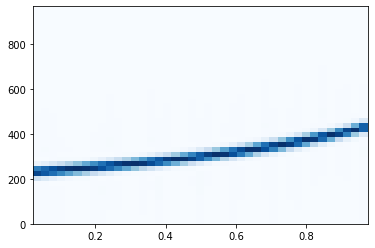

In [23]:
A3=220
A4=440
s=LSTrombone(start= A3,end= A4)
w=s.make_wave(duration=1)
w.make_spectrogram(512).plot(high=1000)


In [25]:
"""第二題"""
import thinkdsp as td

x=td.UncorrelatedGaussianNoise()
x=x.make_wave(duration=1,framerate=10000)
x.ys.shape

(10000,)

(3.4986261710709936, 0.007480574725338229, 0.9950122761978435)

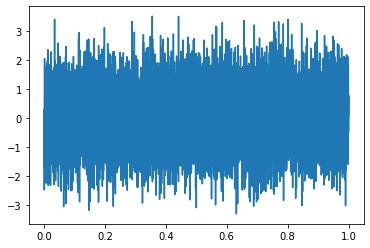

In [32]:
import matplotlib.pyplot as pl
pl.plot(x.ts,x.ys)
x.ys.max(),x.ys.mean(),x.ys.std()

In [37]:
sx=x.make_spectrum()
sx.hs.shape

(5001,)

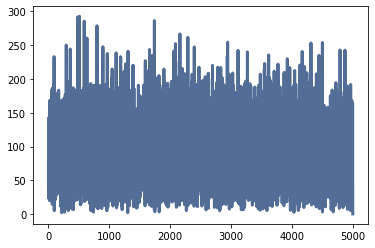

In [38]:
sx.plot()

In [49]:
Sx=sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

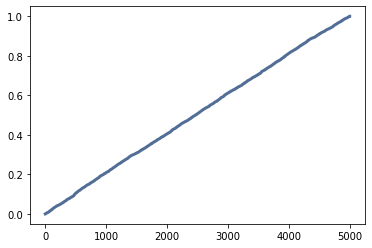

In [48]:
Sx.plot_power()

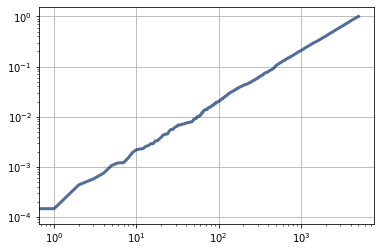

In [44]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)


In [115]:
sx.estimate_slope()

LinregressResult(slope=-0.010705670295087066, intercept=8.680809951908495, rvalue=-0.0081102209460261, pvalue=0.5664109428309121, stderr=0.018671051162182428)

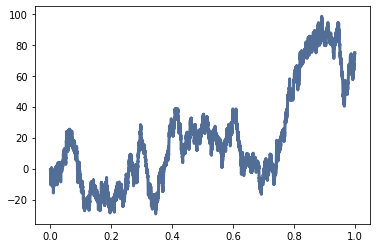

In [83]:
y=x.cumsum()
y.plot()

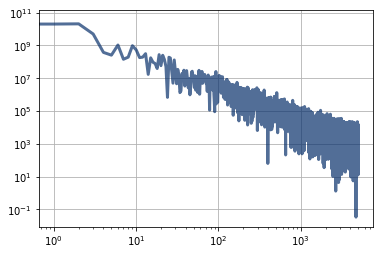

In [108]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

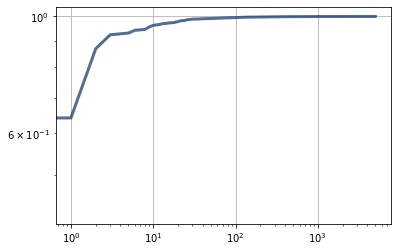

In [111]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)


In [113]:
sy.estimate_slope()


LinregressResult(slope=-1.8238571226723719, intercept=22.82079766093296, rvalue=-0.8200860898390123, pvalue=0.0, stderr=0.018001619534240017)

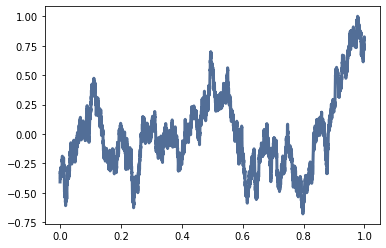

In [88]:
z=td.BrownianNoise().make_wave(duration=1,framerate=10000)
z.plot()

LinregressResult(slope=-1.7922288174485639, intercept=14.379053867858417, rvalue=-0.8162847733317135, pvalue=0.0, stderr=0.01793982417674404)

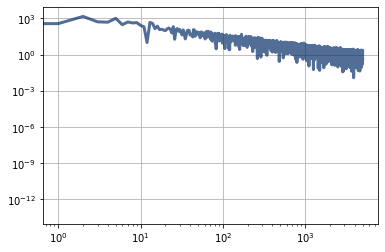

In [105]:
sz=z.make_spectrum()
sz.plot()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)
sz.estimate_slope()


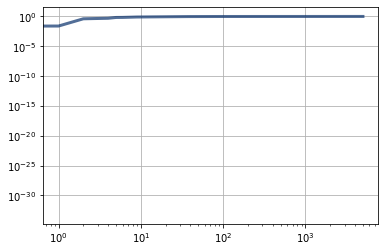

In [116]:
sz.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [94]:
"""第三題"""
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [95]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


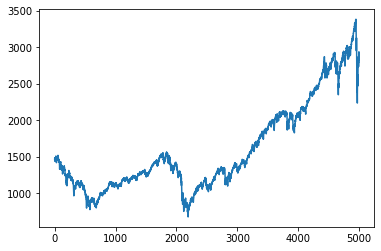

In [97]:
ys=df['Close'].values
ys=ys[-5000:]
pl.plot(ys)

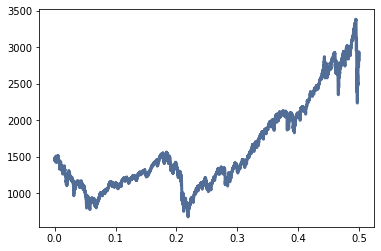

In [98]:
yWave=td.Wave(ys,framerate=10000)
yWave.plot()

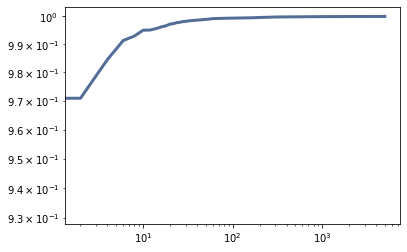

In [101]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
